<span style="font-family:Arial; font-weight:Bold; font-size:2.3em; color:#00b3e5;"> X --- y --- BaseLines
    
    

#     
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Loading Libraries

In [2]:
import time, pickle
import pyts
import numpy  as np
from   numpy import mean, std

import pandas as pd
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',None)

from matplotlib import pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True)
 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from imblearn.combine        import SMOTETomek, SMOTEENN
from imblearn.over_sampling  import SMOTE
 

from sklearn.preprocessing   import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing   import MaxAbsScaler, PowerTransformer, FunctionTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score

from sklearn.metrics         import accuracy_score, recall_score, precision_score
from sklearn.metrics         import classification_report, ConfusionMatrixDisplay

from sklearn.linear_model    import LogisticRegression
from sklearn.tree            import DecisionTreeClassifier 
from sklearn.tree            import plot_tree

from sklearn.ensemble        import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble        import HistGradientBoostingClassifier
from imblearn.ensemble       import EasyEnsembleClassifier 

from sklearn.ensemble        import StackingClassifier, VotingClassifier

import warnings 
warnings.filterwarnings('ignore') 


from imblearn.over_sampling  import RandomOverSampler
from imblearn.over_sampling  import SMOTE  # oversampler
from imblearn.over_sampling  import BorderlineSMOTE
from imblearn.over_sampling  import SVMSMOTE
from imblearn.over_sampling  import ADASYN

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule

from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Importing Dataset

In [3]:
data = pickle.load( open('Data_FeatureSelected','rb') )  # load 
print(f'there are {data.shape[0]} rows and {data.shape[1]} columns.')
data.tail()

there are 25770 rows and 36 columns.


,arrival_day,arrival_year,avg_price_per_room,booking_status,lead_time,market_segment_type,market_segment_type_01_Jan,market_segment_type_02_Feb,market_segment_type_03_Mar,market_segment_type_04_Apr,market_segment_type_06_Jun,market_segment_type_08_Aug,market_segment_type_10_Oct,market_segment_type_11_Nov,no_of_adults,no_of_special_requests,no_of_week_nights,no_of_weekend_nights,room_type_reserved,room_type_reserved_01_Jan,room_type_reserved_02_Feb,room_type_reserved_03_Mar,room_type_reserved_04_Apr,room_type_reserved_05_May,room_type_reserved_06_Jun,room_type_reserved_07_Jul,room_type_reserved_08_Aug,room_type_reserved_09_Sep,room_type_reserved_10_Oct,room_type_reserved_11_Nov,room_type_reserved_12_Dec,type_of_meal_plan,type_of_meal_plan_01_Jan,type_of_meal_plan_10_Oct,type_of_meal_plan_11_Nov,arrival_month
25765,27,2017,68.00,Not_Canceled,60.0,Offline,3.82,4.76,6.16,5.28,5.88,11.48,11.20,8.88,2.0,0.0,3.0,2.0,Room_Type 1,3.41,5.44,7.97,7.31,6.49,7.07,8.22,11.40,11.81,12.12,9.44,9.33,Meal Plan 1,3.07,12.70,8.21,12_Dec
25766,24,2017,77.25,Not_Canceled,12.0,Online,2.60,4.74,7.41,8.60,7.25,13.10,11.72,7.92,2.0,1.0,2.0,0.0,Room_Type 2,1.92,3.69,7.97,7.31,8.38,7.97,10.50,11.49,12.62,12.12,4.17,7.78,Meal Plan 1,3.07,12.70,8.21,12_Dec
25767,25,2018,95.20,Not_Canceled,24.0,Online,2.60,4.74,7.41,8.60,7.25,13.10,11.72,7.92,2.0,1.0,2.0,2.0,Room_Type 1,3.41,5.44,7.97,7.31,6.49,7.07,8.22,11.40,11.81,12.12,9.44,9.33,Meal Plan 1,3.07,12.70,8.21,12_Dec
25768,20,2018,90.40,Not_Canceled,117.0,Online,2.60,4.74,7.41,8.60,7.25,13.10,11.72,7.92,2.0,1.0,5.0,2.0,Room_Type 1,3.41,5.44,7.97,7.31,6.49,7.07,8.22,11.40,11.81,12.12,9.44,9.33,Meal Plan 1,3.07,12.70,8.21,12_Dec
25769,24,2017,85.00,Not_Canceled,0.0,Online,2.60,4.74,7.41,8.60,7.25,13.10,11.72,7.92,2.0,0.0,1.0,0.0,Room_Type 1,3.41,5.44,7.97,7.31,6.49,7.07,8.22,11.40,11.81,12.12,9.44,9.33,Not Selected,3.07,13.49,4.67,12_Dec


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Estimated Column

In [4]:
estimated_column = pickle.load( open('estimated_column','rb') )  # load
RANDOM_STATE     =  3
SCORING          = 'recall_macro'   # 'recall'   'accuracy' ‘precision’   ‘jaccard’
                                    # ‘f1_micro’ ‘f1_macro’ ‘f1_weighted’ ‘f1_samples’

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Drop Null Values from Estimated Column

In [5]:
data = data.dropna( subset=[estimated_column] ) 

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Value_Counts

In [6]:
data[estimated_column].value_counts()

arrival_month
10_Oct    3184
08_Aug    3028
09_Sep    3011
12_Dec    2354
07_Jul    2270
11_Nov    2172
04_Apr    2024
03_Mar    1985
06_Jun    1838
05_May    1831
02_Feb    1310
01_Jan     763
Name: count, dtype: int64

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Handling Duplicates

In [7]:
print('Before Treatment:\nn duplicates =', sum(data.duplicated())) 

Before Treatment:
n duplicates = 63


In [8]:
if sum( data.duplicated() ) > 0:
    data = data.drop_duplicates()
    data.index = range( data.shape[0] )
print('After Treatment:\nn duplicates =', sum(data.duplicated())) 

After Treatment:
n duplicates = 0


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Classes

In [9]:
Classes = list( data[estimated_column].unique() ) 
Classes.sort()

pickle.dump( Classes , open('Classes' ,'wb') )  # save
Classes = pickle.load( open('Classes' ,'rb') )  # load
Classes

['01_Jan',
 '02_Feb',
 '03_Mar',
 '04_Apr',
 '05_May',
 '06_Jun',
 '07_Jul',
 '08_Aug',
 '09_Sep',
 '10_Oct',
 '11_Nov',
 '12_Dec']

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Loading Dicts

In [10]:
# Binary
Binary_Dicts    = pickle.load( open('Binary_Dicts' ,'rb') )  # load

# Nominal
Ordinal_Dicts   = pickle.load( open('Ordinal_Dicts','rb') )  # load

# Nominal
Nominal_Cats    = pickle.load( open('Selected_Nominal_Cats'   ,'rb') )  # load
Nominal_SubCats = pickle.load( open('Selected_Nominal_SubCats','rb') )  # load
Nominal_Dicts   = pickle.load( open(         'Nominal_Dicts'  ,'rb') )  # load

In [11]:
# help
Binary_Dicts

,Binary_Cat,Dict
0,required_car_parking_space,"{0: 'No', 1: 'Yes'}"
1,arrival_year,"{0: '2017', 1: '2018'}"
2,repeated_guest,"{0: 'No', 1: 'Yes'}"
3,booking_status,"{0: 'Canceled', 1: 'Not_Canceled'}"


In [12]:
# help
Ordinal_Dicts

,Ordinal_Cat,Dict
0,arrival_month,"{0: '01_Jan', 1: '02_Feb', 2: '03_Mar', 3: '04..."
1,arrival_day,"{0: '01', 1: '02', 2: '03', 3: '04', 4: '05', ..."


In [13]:
# help
print('Nominal_Cats:   ',Nominal_Cats)
print('Nominal_SubCats:',Nominal_SubCats)
Nominal_Dicts

Nominal_Cats:    ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
Nominal_SubCats: ['market_segment_type_02_Feb', 'type_of_meal_plan_01_Jan', 'room_type_reserved_10_Oct', 'room_type_reserved_09_Sep', 'room_type_reserved_01_Jan', 'market_segment_type_08_Aug', 'room_type_reserved_04_Apr', 'market_segment_type_10_Oct', 'room_type_reserved_05_May', 'room_type_reserved_08_Aug', 'market_segment_type_01_Jan', 'room_type_reserved_03_Mar', 'type_of_meal_plan_11_Nov', 'market_segment_type_06_Jun', 'room_type_reserved_07_Jul', 'room_type_reserved_02_Feb', 'room_type_reserved_11_Nov', 'market_segment_type_04_Apr', 'room_type_reserved_06_Jun', 'market_segment_type_11_Nov', 'market_segment_type_03_Mar', 'type_of_meal_plan_10_Oct', 'room_type_reserved_12_Dec']


,NomCat_DF
type_of_meal_plan,type_of_meal_plan type_of_meal_plan_01_Jan ...
room_type_reserved,room_type_reserved room_type_reserved_01_Ja...
market_segment_type,market_segment_type market_segment_type_01_...


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Correcting Nominal_Cats
 - removing **estimated_column** from **Nominal_Cats**

In [14]:
try: 
    Nominal_Cats.remove(estimated_column)
except: 
    Nominal_Cats = Nominal_Cats

print( " estimated_column:  ", estimated_column )
print( " Nominal_Cats:    "  , Nominal_Cats     )

 estimated_column:   arrival_month
 Nominal_Cats:     ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Converting Binary & Ordinal Features into numbers

In [15]:
# auto

Bin_Cols = Binary_Dicts[ 'Binary_Cat' ].tolist()
Ord_Cols = Ordinal_Dicts['Ordinal_Cat'].tolist()

''' 
if estimated_column in Bin_Cols:
    Bin_Cols.remove(estimated_column)
elif estimated_column in Ord_Cols:
    Ord_Cols.remove(estimated_column)
''' 

i = 0
for c in Bin_Cols:
    if c in data.columns:
        Dict = Binary_Dicts.loc[i,'Dict']
        #print(Dict.keys())
        for key in Dict.keys():
            #print(key,Dict[key])
            data[c] = data[c].replace( Dict[key], key )  
    i = i + 1
    
i = 0
for c in Ord_Cols:
    if c in data.columns:
        Dict = Ordinal_Dicts.loc[i,'Dict']
        #print(Dict.keys())
        for key in Dict.keys():
            #print(key,Dict[key])
            data[c] = data[c].replace( Dict[key], key ) 
    i = i + 1
    
data.tail(3)

,arrival_day,arrival_year,avg_price_per_room,booking_status,lead_time,market_segment_type,market_segment_type_01_Jan,market_segment_type_02_Feb,market_segment_type_03_Mar,market_segment_type_04_Apr,market_segment_type_06_Jun,market_segment_type_08_Aug,market_segment_type_10_Oct,market_segment_type_11_Nov,no_of_adults,no_of_special_requests,no_of_week_nights,no_of_weekend_nights,room_type_reserved,room_type_reserved_01_Jan,room_type_reserved_02_Feb,room_type_reserved_03_Mar,room_type_reserved_04_Apr,room_type_reserved_05_May,room_type_reserved_06_Jun,room_type_reserved_07_Jul,room_type_reserved_08_Aug,room_type_reserved_09_Sep,room_type_reserved_10_Oct,room_type_reserved_11_Nov,room_type_reserved_12_Dec,type_of_meal_plan,type_of_meal_plan_01_Jan,type_of_meal_plan_10_Oct,type_of_meal_plan_11_Nov,arrival_month
25704,24,1,95.2,1,24.0,Online,2.6,4.74,7.41,8.6,7.25,13.1,11.72,7.92,2.0,1.0,2.0,2.0,Room_Type 1,3.41,5.44,7.97,7.31,6.49,7.07,8.22,11.4,11.81,12.12,9.44,9.33,Meal Plan 1,3.07,12.70,8.21,11
25705,19,1,90.4,1,117.0,Online,2.6,4.74,7.41,8.6,7.25,13.1,11.72,7.92,2.0,1.0,5.0,2.0,Room_Type 1,3.41,5.44,7.97,7.31,6.49,7.07,8.22,11.4,11.81,12.12,9.44,9.33,Meal Plan 1,3.07,12.70,8.21,11
25706,23,0,85.0,1,0.0,Online,2.6,4.74,7.41,8.6,7.25,13.1,11.72,7.92,2.0,0.0,1.0,0.0,Room_Type 1,3.41,5.44,7.97,7.31,6.49,7.07,8.22,11.4,11.81,12.12,9.44,9.33,Not Selected,3.07,13.49,4.67,11


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Splitting: Training, Validation, Test
 - ratio 60:20:20 
 - ratio 10:80:10 ... 100K records, 23 features

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> X & y

In [16]:
#Data_Nominal = data[      Nominal_Cats         ].copy()
#Data         = data.drop( Nominal_Cats, axis=1 ).copy()

X = data.drop([estimated_column], axis=1).copy()  
#X = pd.get_dummies( X ).replace(False,0).replace(True,1)

y = data[estimated_column].copy()
y = LabelEncoder().fit_transform( y )

In [17]:
X.tail()

,arrival_day,arrival_year,avg_price_per_room,booking_status,lead_time,market_segment_type,market_segment_type_01_Jan,market_segment_type_02_Feb,market_segment_type_03_Mar,market_segment_type_04_Apr,market_segment_type_06_Jun,market_segment_type_08_Aug,market_segment_type_10_Oct,market_segment_type_11_Nov,no_of_adults,no_of_special_requests,no_of_week_nights,no_of_weekend_nights,room_type_reserved,room_type_reserved_01_Jan,room_type_reserved_02_Feb,room_type_reserved_03_Mar,room_type_reserved_04_Apr,room_type_reserved_05_May,room_type_reserved_06_Jun,room_type_reserved_07_Jul,room_type_reserved_08_Aug,room_type_reserved_09_Sep,room_type_reserved_10_Oct,room_type_reserved_11_Nov,room_type_reserved_12_Dec,type_of_meal_plan,type_of_meal_plan_01_Jan,type_of_meal_plan_10_Oct,type_of_meal_plan_11_Nov
25702,26,0,68.00,1,60.0,Offline,3.82,4.76,6.16,5.28,5.88,11.48,11.20,8.88,2.0,0.0,3.0,2.0,Room_Type 1,3.41,5.44,7.97,7.31,6.49,7.07,8.22,11.40,11.81,12.12,9.44,9.33,Meal Plan 1,3.07,12.70,8.21
25703,23,0,77.25,1,12.0,Online,2.60,4.74,7.41,8.60,7.25,13.10,11.72,7.92,2.0,1.0,2.0,0.0,Room_Type 2,1.92,3.69,7.97,7.31,8.38,7.97,10.50,11.49,12.62,12.12,4.17,7.78,Meal Plan 1,3.07,12.70,8.21
25704,24,1,95.20,1,24.0,Online,2.60,4.74,7.41,8.60,7.25,13.10,11.72,7.92,2.0,1.0,2.0,2.0,Room_Type 1,3.41,5.44,7.97,7.31,6.49,7.07,8.22,11.40,11.81,12.12,9.44,9.33,Meal Plan 1,3.07,12.70,8.21
25705,19,1,90.40,1,117.0,Online,2.60,4.74,7.41,8.60,7.25,13.10,11.72,7.92,2.0,1.0,5.0,2.0,Room_Type 1,3.41,5.44,7.97,7.31,6.49,7.07,8.22,11.40,11.81,12.12,9.44,9.33,Meal Plan 1,3.07,12.70,8.21
25706,23,0,85.00,1,0.0,Online,2.60,4.74,7.41,8.60,7.25,13.10,11.72,7.92,2.0,0.0,1.0,0.0,Room_Type 1,3.41,5.44,7.97,7.31,6.49,7.07,8.22,11.40,11.81,12.12,9.44,9.33,Not Selected,3.07,13.49,4.67


In [18]:
X.shape

(25707, 35)

In [19]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
y.shape

(25707,)

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Splitting into Train, Valid, Test

In [21]:
# help
data[estimated_column].value_counts()

arrival_month
9     3168
7     3025
8     3004
11    2341
6     2268
10    2169
3     2018
2     1982
5     1836
4     1828
1     1308
0      760
Name: count, dtype: int64

In [22]:
''' 
X_Train, X_ValidTest, y_Train, y_ValidTest  =  train_test_split(        
          X, y
        , random_state  =  RANDOM_STATE
        , test_size     =  50/759
        , shuffle       =  True 
        , stratify      =  y
        )
X_Train.index      = range( X_Train.shape[0] )
X_ValidTest.index  = range( X_ValidTest.shape[0]        ) 

X = X_ValidTest
y = y_ValidTest

X_Valid, X_Test, y_Valid, y_Test  =  train_test_split(        
          X, y
        , random_state  =  RANDOM_STATE
        , test_size     =  50/100
        , shuffle       =  True 
        , stratify      =  y
        )
X_Valid.index = range( X_Valid.shape[0] )
X_Test.index  = range( X_Test.shape[0]  ) 
''' 
pass

In [23]:
X_TrainValid, X_Test, y_TrainValid, y_Test  =  train_test_split(        
          X, y
        , random_state  =  RANDOM_STATE
        , test_size     =  100/760
        , shuffle       =  True 
        , stratify      =  y
        )
X_TrainValid.index      = range( X_TrainValid.shape[0] )
X_Test.index            = range( X_Test.shape[0]       ) 

X = X_TrainValid
y = y_TrainValid

X_Train, X_Valid, y_Train, y_Valid  =  train_test_split(        
          X, y
        , random_state  =  RANDOM_STATE
        , test_size     =  100/660
        , shuffle       =  True 
        , stratify      =  y
        )
X_Train.index = range( X_Train.shape[0] )
X_Valid.index = range( X_Valid.shape[0] ) 

In [24]:
X_TrainValid_Nominal = X_TrainValid[      Nominal_Cats         ].copy()
X_TrainValid         = X_TrainValid.drop( Nominal_Cats, axis=1 ).copy()

X_Train_Nominal      = X_Train[           Nominal_Cats         ].copy()
X_Valid_Nominal      = X_Valid[           Nominal_Cats         ].copy()
X_Test_Nominal       = X_Test[            Nominal_Cats         ].copy()

X_Train              = X_Train.drop(      Nominal_Cats, axis=1 ).copy()
X_Valid              = X_Valid.drop(      Nominal_Cats, axis=1 ).copy()
X_Test               = X_Test.drop(       Nominal_Cats, axis=1 ).copy()

In [25]:
X_Train.shape

(18941, 32)

In [26]:
X_Valid.shape

(3383, 32)

In [27]:
X_Test.shape

(3383, 32)

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Counting Subcats of Sets

In [28]:
pd.crosstab( y_Train, columns='Subcat-Count' )

col_0,Subcat-Count
row_0,
0,560
1,964
2,1460
3,1487
4,1347
5,1352
6,1671
7,2229
8,2214


In [29]:
pd.crosstab( y_Valid, columns='Subcat-Count' )  

col_0,Subcat-Count
row_0,
0,100
1,172
2,261
3,265
4,240
5,242
6,299
7,398
8,395


In [30]:
pd.crosstab( y_Test, columns='Subcat-Count' )  

col_0,Subcat-Count
row_0,
0,100
1,172
2,261
3,266
4,241
5,242
6,298
7,398
8,395


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Saving Data Sets

In [31]:
pickle.dump( X_Train_Nominal, open('X_Train_Nominal','wb') )  # save
pickle.dump( X_Valid_Nominal, open('X_Valid_Nominal','wb') )  # save
pickle.dump( X_Test_Nominal , open('X_Test_Nominal' ,'wb') )  # save

pickle.dump( X_Train        , open('X_Train_Encoded','wb') )  # save
pickle.dump( X_Valid        , open('X_Valid_Encoded','wb') )  # save
pickle.dump( X_Test         , open('X_Test_Encoded' ,'wb') )  # save

pickle.dump( y_Train        , open('y_Train_Encoded','wb') )  # save
pickle.dump( y_Valid        , open('y_Valid_Encoded','wb') )  # save
pickle.dump( y_Test         , open('y_Test_Encoded' ,'wb') )  # save

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Loading Data Sets

In [32]:
X_Train_Nominal = pickle.load( open('X_Train_Nominal','rb') )  # load
X_Valid_Nominal = pickle.load( open('X_Valid_Nominal','rb') )  # load
X_Test_Nominal  = pickle.load( open('X_Test_Nominal' ,'rb') )  # load

X_Train         = pickle.load( open('X_Train_Encoded','rb') )  # load
X_Valid         = pickle.load( open('X_Valid_Encoded','rb') )  # load
X_Test          = pickle.load( open('X_Test_Encoded' ,'rb') )  # load

y_Train         = pickle.load( open('y_Train_Encoded','rb') )  # load
y_Valid         = pickle.load( open('y_Valid_Encoded','rb') )  # load
y_Test          = pickle.load( open('y_Test_Encoded' ,'rb') )  # load

** **

#     
#     
<span style="font-family:Arial; font-weight:Bold; font-size:2.3em; color:deeppink;"> Renaming Classes

In [33]:
# help
Classes

['01_Jan',
 '02_Feb',
 '03_Mar',
 '04_Apr',
 '05_May',
 '06_Jun',
 '07_Jul',
 '08_Aug',
 '09_Sep',
 '10_Oct',
 '11_Nov',
 '12_Dec']

In [34]:
# input
Classes = ['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

# auto
pickle.dump( Classes,  open('Classes','wb') )  # save
Classes = pickle.load( open('Classes','rb') )  # load
Classes

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

** **

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> DTree Plot

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Scaling

In [35]:
Scaler0 = None
Scaler1 = StandardScaler()    # z-score
Scaler2 = MinMaxScaler()      # 0  1
Scaler3 = MaxAbsScaler()      # 0+ 1
Scaler4 = PowerTransformer()
Scaler5 = FunctionTransformer(np.log1p)
Scaler6 = FunctionTransformer(np.exp)
Scaler7 = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)

Scaler  = Scaler1

if Scaler == None:
    X_Train_Scaled = X_Train.copy()
    X_Valid_Scaled = X_Valid.copy()
    X_Test_Scaled  = X_Test.copy()
else:
    Scaler.fit( X_TrainValid )                   # fit
    pickle.dump( Scaler,  open('Scaler','wb') )  # save
    Scaler = pickle.load( open('Scaler','rb') )  # load
    X_Train_Scaled = pd.DataFrame( Scaler.transform(X_Train), columns=X_Train.columns )
    X_Valid_Scaled = pd.DataFrame( Scaler.transform(X_Valid), columns=X_Valid.columns )
    X_Test_Scaled  = pd.DataFrame( Scaler.transform(X_Test),  columns=X_Test.columns  ) 

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Saving

In [36]:
pickle.dump( X_Train_Scaled, open('X_Train_Scaled','wb') )  # save
pickle.dump( X_Valid_Scaled, open('X_Valid_Scaled','wb') )  # save
pickle.dump( X_Test_Scaled , open('X_Test_Scaled' ,'wb') )  # save

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Loading

In [37]:
X_Train = pickle.load( open('X_Train_Scaled' ,'rb') )  # load
X_Valid = pickle.load( open('X_Valid_Scaled' ,'rb') )  # load
X_Test  = pickle.load( open('X_Test_Scaled'  ,'rb') )  # load

y_Train = pickle.load( open('y_Train_Encoded','rb') )  # load
y_Valid = pickle.load( open('y_Valid_Encoded','rb') )  # load
y_Test  = pickle.load( open('y_Test_Encoded' ,'rb') )  # load

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> PCA

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA().fit( X_Train )   # X_Train = X_Train_Scaled

pickle.dump( pca,  open('pca','wb') )  # save
pca = pickle.load( open('pca','rb') )  # load
pca

PCA()

In [40]:
try:
    X_Train_PCA = pca.transform( X_Train )
    X_Train_PCA = np.column_stack((
        #X_Train_PCA[:,0],
        #X_Train_PCA[:,1],
        #X_Train_PCA[:,2] 
    ))
    X_Train_PCA = pd.DataFrame(  
        X_Train_PCA, columns=[
            # 'pca1'
            #,'pca2'
            #,'pca3'
        ]) 
    X_Train_PCA = pd.concat( [X_Train_PCA,X_Train], axis=1 )
except:
    X_Train_PCA = X_Train.copy()
    
pickle.dump( X_Train_PCA,  open('X_Train_PCA','wb') )  # save
X_Train_PCA = pickle.load( open('X_Train_PCA','rb') )  # load
X_Train_PCA.tail()

,arrival_day,arrival_year,avg_price_per_room,booking_status,lead_time,market_segment_type_01_Jan,market_segment_type_02_Feb,market_segment_type_03_Mar,market_segment_type_04_Apr,market_segment_type_06_Jun,market_segment_type_08_Aug,market_segment_type_10_Oct,market_segment_type_11_Nov,no_of_adults,no_of_special_requests,no_of_week_nights,no_of_weekend_nights,room_type_reserved_01_Jan,room_type_reserved_02_Feb,room_type_reserved_03_Mar,room_type_reserved_04_Apr,room_type_reserved_05_May,room_type_reserved_06_Jun,room_type_reserved_07_Jul,room_type_reserved_08_Aug,room_type_reserved_09_Sep,room_type_reserved_10_Oct,room_type_reserved_11_Nov,room_type_reserved_12_Dec,type_of_meal_plan_01_Jan,type_of_meal_plan_10_Oct,type_of_meal_plan_11_Nov
18936,-1.666071,0.419966,-0.376247,0.636047,1.281190,-0.110059,0.18073,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-0.045300,-0.959987,-0.911481,0.149941,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.399750,-0.041995,-0.297214,2.189504,-2.083535
18937,1.043187,0.419966,-0.376247,-1.572212,1.519598,-0.110059,0.18073,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-0.045300,-0.959987,-0.160192,0.149941,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.399750,-0.041995,-0.297214,2.189504,-2.083535
18938,0.478758,-2.381145,-0.809434,0.636047,-0.085680,-0.110059,0.18073,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,1.880932,0.385067,-0.911481,1.321544,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.399750,-0.041995,-0.297214,-0.456724,0.354747
18939,-0.650099,0.419966,1.640990,0.636047,-0.101573,-0.110059,0.18073,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-1.971531,1.730121,-0.160192,0.149941,-1.391975,-1.752117,-2.054207,2.122448,1.761609,-1.908937,1.193274,0.435830,-0.997990,-0.354845,-1.172686,1.619193,-0.297214,-0.456724,0.354747
18940,1.494730,0.419966,1.693602,0.636047,2.044095,-0.110059,0.18073,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-0.045300,-0.959987,0.591096,-1.021663,2.958091,1.934908,0.581178,-1.464935,-2.379286,1.720408,0.539072,0.435830,-0.997990,-0.242913,-2.378220,-2.242715,-0.297214,-0.456724,0.354747


In [41]:
try:
    X_Valid_PCA = pca.transform( X_Valid )
    X_Valid_PCA = np.column_stack((
        #X_Valid_PCA[:,0],
        #X_Valid_PCA[:,1],
        #X_Valid_PCA[:,2] 
    ))
    X_Valid_PCA = pd.DataFrame(  
        X_Valid_PCA, columns=[
            # 'pca1'
            #,'pca2'
            #,'pca3'
        ]) 
    X_Valid_PCA = pd.concat( [X_Valid_PCA,X_Valid], axis=1 )
except:
    X_Valid_PCA = X_Valid.copy()

pickle.dump( X_Valid_PCA,  open('X_Valid_PCA','wb') )  # save
X_Valid_PCA = pickle.load( open('X_Valid_PCA','rb') )  # load
X_Valid_PCA.tail()

,arrival_day,arrival_year,avg_price_per_room,booking_status,lead_time,market_segment_type_01_Jan,market_segment_type_02_Feb,market_segment_type_03_Mar,market_segment_type_04_Apr,market_segment_type_06_Jun,market_segment_type_08_Aug,market_segment_type_10_Oct,market_segment_type_11_Nov,no_of_adults,no_of_special_requests,no_of_week_nights,no_of_weekend_nights,room_type_reserved_01_Jan,room_type_reserved_02_Feb,room_type_reserved_03_Mar,room_type_reserved_04_Apr,room_type_reserved_05_May,room_type_reserved_06_Jun,room_type_reserved_07_Jul,room_type_reserved_08_Aug,room_type_reserved_09_Sep,room_type_reserved_10_Oct,room_type_reserved_11_Nov,room_type_reserved_12_Dec,type_of_meal_plan_01_Jan,type_of_meal_plan_10_Oct,type_of_meal_plan_11_Nov
3378,-1.553186,0.419966,0.422394,-1.572212,1.742112,-0.110059,0.180730,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-0.0453,0.385067,-0.160192,1.321544,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.39975,-0.041995,-0.297214,-0.456724,0.354747
3379,0.930301,0.419966,-0.347892,-1.572212,1.424235,-0.110059,0.180730,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-0.0453,-0.959987,-0.160192,-1.021663,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.39975,-0.041995,-0.297214,-0.456724,0.354747
3380,-1.101643,0.419966,1.025706,0.636047,-0.705539,-0.110059,0.180730,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-0.0453,0.385067,-0.911481,-1.021663,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.39975,-0.041995,-0.297214,-0.456724,0.354747
3381,1.607616,0.419966,1.109823,0.636047,-0.578389,1.225566,0.202894,-1.888922,-1.008924,-2.496641,-0.641324,-2.332812,2.374340,-0.0453,0.385067,-0.160192,0.149941,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.39975,-0.041995,-0.297214,-0.456724,0.354747
3382,1.720502,-2.381145,-0.192575,0.636047,0.311666,1.225566,0.202894,-1.888922,-1.008924,-2.496641,-0.641324,-2.332812,2.374340,-0.0453,-0.959987,0.591096,-1.021663,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.39975,-0.041995,-0.297214,-0.456724,1.876952


In [42]:
try:
    X_Test_PCA = pca.transform( X_Test )
    X_Test_PCA = np.column_stack((
        #X_Test_PCA[:,0],
        #X_Test_PCA[:,1],
        #X_Test_PCA[:,2] 
    ))
    X_Test_PCA = pd.DataFrame(  
        X_Test_PCA, columns=[
            # 'pca1'
            #,'pca2'
            #,'pca3'
        ]) 
    X_Test_PCA = pd.concat( [X_Test_PCA,X_Test], axis=1 )
except:
    X_Test_PCA = X_Test.copy()

pickle.dump( X_Test_PCA,  open('X_Test_PCA','wb') )  # save
X_Test_PCA = pickle.load( open('X_Test_PCA','rb') )  # load
X_Test_PCA.tail()

,arrival_day,arrival_year,avg_price_per_room,booking_status,lead_time,market_segment_type_01_Jan,market_segment_type_02_Feb,market_segment_type_03_Mar,market_segment_type_04_Apr,market_segment_type_06_Jun,market_segment_type_08_Aug,market_segment_type_10_Oct,market_segment_type_11_Nov,no_of_adults,no_of_special_requests,no_of_week_nights,no_of_weekend_nights,room_type_reserved_01_Jan,room_type_reserved_02_Feb,room_type_reserved_03_Mar,room_type_reserved_04_Apr,room_type_reserved_05_May,room_type_reserved_06_Jun,room_type_reserved_07_Jul,room_type_reserved_08_Aug,room_type_reserved_09_Sep,room_type_reserved_10_Oct,room_type_reserved_11_Nov,room_type_reserved_12_Dec,type_of_meal_plan_01_Jan,type_of_meal_plan_10_Oct,type_of_meal_plan_11_Nov
3378,-0.875871,0.419966,-0.423503,0.636047,-0.705539,-0.110059,0.180730,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-0.045300,-0.959987,-0.911481,-1.021663,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.39975,-0.041995,-0.297214,-0.456724,0.354747
3379,0.027215,0.419966,-0.486512,0.636047,-0.117467,1.225566,0.202894,-1.888922,-1.008924,-2.241015,-0.641324,-2.332812,2.374340,1.880932,-0.959987,-0.160192,-1.021663,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.39975,-0.041995,3.364534,-0.456724,1.876952
3380,1.381844,0.419966,-0.319538,-1.572212,0.852057,-0.110059,0.180730,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-0.045300,-0.959987,0.591096,-1.021663,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.39975,-0.041995,-0.297214,-0.456724,0.354747
3381,0.140101,-2.381145,-0.518017,0.636047,2.489122,1.225566,0.202894,-1.888922,-1.008924,-2.241015,-2.944847,1.503339,2.374340,-1.971531,-0.959987,-0.911481,1.321544,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.39975,-0.041995,-0.297214,-0.456724,0.354747
3382,-1.553186,0.419966,1.275222,0.636047,0.995101,-0.110059,0.180730,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-1.971531,0.385067,0.591096,1.321544,-1.521035,-1.970352,-2.054207,2.201075,1.153506,1.720408,0.539072,0.435830,-0.997990,-0.242913,-2.37822,-2.242715,-0.297214,-0.456724,0.354747


#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Loading

In [43]:
X_Train = pickle.load( open('X_Train_PCA'    ,'rb') )  # load
X_Valid = pickle.load( open('X_Valid_PCA'    ,'rb') )  # load
X_Test  = pickle.load( open('X_Test_PCA'     ,'rb') )  # load

y_Train = pickle.load( open('y_Train_Encoded','rb') )  # load
y_Valid = pickle.load( open('y_Valid_Encoded','rb') )  # load
y_Test  = pickle.load( open('y_Test_Encoded' ,'rb') )  # load

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> X_All .. .. .. y_All

In [44]:
X_All = pd.concat([X_Train,X_Valid,X_Test],axis=0)
X_All.index = range(X_All.shape[0])
y_All = np.array( y_Train.tolist()+y_Valid.tolist()+y_Test.tolist() )

pickle.dump( X_All,  open('X_All','wb') )  # save
X_All = pickle.load( open('X_All','rb') )  # load

pickle.dump( y_All,  open('y_All','wb') )  # save
y_All = pickle.load( open('y_All','rb') )  # load

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Checking Imbalance in Data

col_0          count
arrival_month       
9               3168
7               3025
8               3004
11              2341
6               2268
10              2169
3               2018
2               1982
5               1836
4               1828
1               1308
0                760


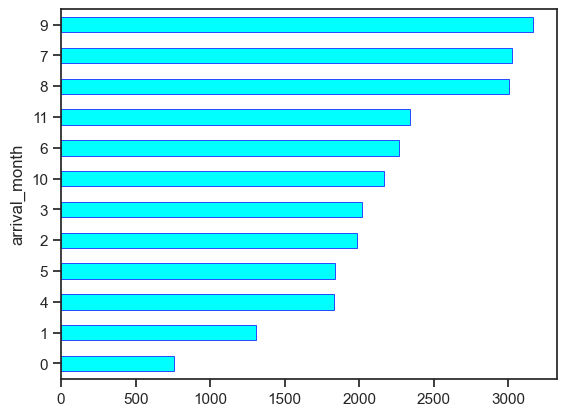

In [45]:
df = data.copy()
x  = estimated_column

# Frequency Table  
freq_tab = pd.crosstab( index=df[x].astype('str'), columns='count' )
print(freq_tab.sort_values('count',ascending=False))

# Barh
L = df[x].astype('str')
L.value_counts(normalize=False).sort_values().plot.barh(linewidth=.5, edgecolor='blue', facecolor='cyan'); plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report: 
 - Data is **Imbalanced** and needs treatment.

** **

<span style="font-family:Arial; font-weight:Bold; font-size:2.3em; color:red;"> Treating Imbalance by SMOTE

In [46]:
''' 
Xy = X_Train.copy()
Xy[estimated_column] = y_Train 

Xy0 = Xy[ Xy[estimated_column]==0 ];   Xy0.index=range( Xy0.shape[0] )
Xy1 = Xy[ Xy[estimated_column]==1 ];   Xy1.index=range( Xy1.shape[0] )

if Xy0.shape[0] < Xy1.shape[0]:
    XyMin, XyMax = Xy0, Xy1
else:
    XyMin, XyMax = Xy1, Xy0 

Xy      = pd.concat([ XyMin, 
                      XyMax.sample(int( XyMax.shape[0] * 1/1 )) 
                    ], axis=0 )

X_Train = Xy.drop([estimated_column],axis=1)
y_Train = Xy[estimated_column].tolist(); y_Train=np.array(y_Train)
''' 
pass

In [47]:
# define oversampling strategy 
Sampler_01 = RandomOverSampler(sampling_strategy='minority')   # sampling_strategy=0.1
Sampler_02 = SMOTE( random_state=RANDOM_STATE, sampling_strategy='auto', k_neighbors=3 )
Sampler_03 = BorderlineSMOTE()
Sampler_04 = SVMSMOTE()
Sampler_05 = ADASYN()

Sampler_06 = RandomUnderSampler(sampling_strategy='majority')  # sampling_strategy=0.5
Sampler_07 = NearMiss(version=1, n_neighbors=3)
Sampler_08 = CondensedNearestNeighbour(n_neighbors=3)
Sampler_09 = TomekLinks()
Sampler_10 = EditedNearestNeighbours(n_neighbors=1)
Sampler_11 = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
Sampler_12 = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5 )

Sampler_13 = SMOTETomek( random_state=RANDOM_STATE, sampling_strategy='auto' )
Sampler_14 = SMOTEENN(   random_state=RANDOM_STATE, sampling_strategy='auto' )



Sampler = Sampler_06

X_Train_Balanced, y_Train_Balanced = X_Train, y_Train

for i in range( len(Classes) ):
    X_Train_Balanced, y_Train_Balanced = Sampler.fit_resample( X_Train_Balanced, y_Train_Balanced )

Xy_Balanced                   = X_Train_Balanced;        Xy_Balanced.index=range(Xy_Balanced.shape[0])
Xy_Balanced[estimated_column] = y_Train_Balanced
#Xy_Balanced = pd.concat( [Xy_Balanced,XyMax], axis=0 );  Xy_Balanced.index=range(Xy_Balanced.shape[0])


# Handling Duplicates
print('Before Treatment:\nn duplicates =', sum(Xy_Balanced.duplicated())) 
if sum( Xy_Balanced.duplicated() ) > 0:
    Xy_Balanced = Xy_Balanced.drop_duplicates()
    Xy_Balanced.index = range( Xy_Balanced.shape[0] )
print('After Treatment:\nn duplicates =', sum(Xy_Balanced.duplicated())) 


X_Train_Balanced = Xy_Balanced.drop([estimated_column],axis=1)
y_Train_Balanced = Xy_Balanced[estimated_column].tolist(); y_Train=np.array(y_Train)
X_Train_Balanced.index = range(X_Train_Balanced.shape[0])

Before Treatment:
n duplicates = 0
After Treatment:
n duplicates = 0


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:red;"> Checking Balanced Data

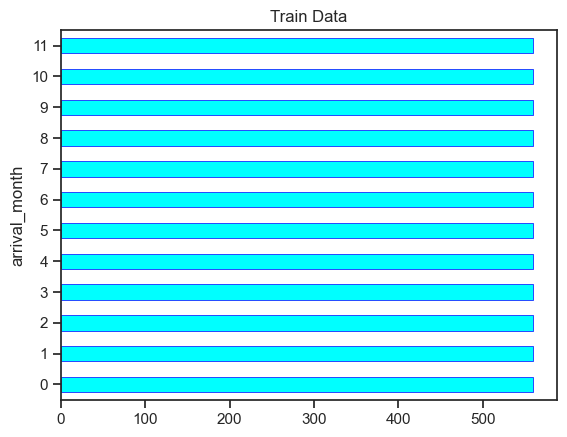

In [48]:
x = estimated_column

df_Train_Balanced      = X_Train_Balanced.copy()
df_Train_Balanced[ x ] = y_Train_Balanced.copy() 

# Train Data
df = df_Train_Balanced.copy() 
L  = df[x].astype('str')
L.value_counts(normalize=False).sort_values().plot.barh(linewidth=.5, edgecolor='blue', facecolor='cyan',title='Train Data'); plt.show()

In [49]:
pd.crosstab( y_Train_Balanced, columns='Subcat-Count' )  

col_0,Subcat-Count
row_0,
0,560
1,560
2,560
3,560
4,560
5,560
6,560
7,560
8,560


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report: 
 - After Mistreatment, Data is **Balanced**

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:red;"> Warning: 
 - Although Mistreated Data looks Charming and Tempting, unfortunately, the models trained by them are overfit and have weak performance.
 - A better solution to overcome the imbalance, is to train the models with the imbalanced data, and boost them via gradient-boost.

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:red;"> (NOT) Assigning 

In [50]:
X_Train = X_Train_Balanced.copy()
y_Train = y_Train_Balanced.copy()

X_Train

,arrival_day,arrival_year,avg_price_per_room,booking_status,lead_time,market_segment_type_01_Jan,market_segment_type_02_Feb,market_segment_type_03_Mar,market_segment_type_04_Apr,market_segment_type_06_Jun,market_segment_type_08_Aug,market_segment_type_10_Oct,market_segment_type_11_Nov,no_of_adults,no_of_special_requests,no_of_week_nights,no_of_weekend_nights,room_type_reserved_01_Jan,room_type_reserved_02_Feb,room_type_reserved_03_Mar,room_type_reserved_04_Apr,room_type_reserved_05_May,room_type_reserved_06_Jun,room_type_reserved_07_Jul,room_type_reserved_08_Aug,room_type_reserved_09_Sep,room_type_reserved_10_Oct,room_type_reserved_11_Nov,room_type_reserved_12_Dec,type_of_meal_plan_01_Jan,type_of_meal_plan_10_Oct,type_of_meal_plan_11_Nov
0,-0.762985,0.419966,-1.163860,0.636047,-0.991628,-0.110059,0.180730,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-0.045300,-0.959987,-0.911481,-1.021663,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.39975,-0.041995,3.364534,2.189504,-2.083535
1,0.027215,0.419966,-1.226869,0.636047,-0.959841,-0.110059,0.180730,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-0.045300,-0.959987,-0.911481,0.149941,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.39975,-0.041995,3.364534,2.189504,-2.083535
2,-0.198556,0.419966,-1.059895,0.636047,-1.023416,-0.110059,0.180730,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-0.045300,-0.959987,-0.911481,-1.021663,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.39975,-0.041995,-0.297214,-0.456724,0.354747
3,-0.085671,0.419966,-1.025240,0.636047,-0.959841,-0.110059,0.180730,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-1.971531,0.385067,-0.911481,-1.021663,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.39975,-0.041995,-0.297214,-0.456724,0.354747
4,-1.440300,0.419966,-1.048707,0.636047,-0.546601,-0.110059,0.180730,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-1.971531,0.385067,-1.662770,0.149941,-1.027572,-1.752117,0.475762,-0.206894,1.153506,1.720408,-0.250237,-4.283968,2.307029,-0.242913,0.39975,-2.242715,-0.297214,-0.456724,0.354747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6715,0.365872,-2.381145,-1.526162,0.636047,-0.832690,1.225566,0.202894,-1.888922,-1.008924,-2.496641,-0.641324,-2.332812,2.374340,-0.045300,0.385067,-0.160192,1.321544,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.39975,-0.041995,-0.297214,-0.456724,0.354747
6716,-0.875871,0.419966,-0.404601,0.636047,-0.117467,-0.110059,0.180730,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-0.045300,0.385067,0.591096,-1.021663,0.103597,0.257943,0.475762,-0.206894,-0.214727,0.235676,-0.250237,0.166981,-0.317545,-0.242913,0.39975,-0.041995,-0.297214,-0.456724,0.354747
6717,0.365872,0.419966,1.589637,-1.572212,-0.514813,-0.110059,0.180730,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-0.045300,-0.959987,-0.911481,0.149941,2.958091,1.934908,0.581178,-1.464935,-2.379286,1.720408,0.539072,0.435830,-0.997990,-0.242913,-2.37822,-2.242715,-0.297214,-0.456724,1.876952
6718,1.494730,0.419966,1.589637,0.636047,-1.007522,-0.110059,0.180730,0.237113,-0.058262,0.421762,0.353799,0.257836,-0.421688,-0.045300,-0.959987,-0.911481,-1.021663,2.958091,1.934908,0.581178,-1.464935,-2.379286,1.720408,0.539072,0.435830,-0.997990,-0.242913,-2.37822,-2.242715,-0.297214,-0.456724,0.354747


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Saving Data Sets

In [51]:
pickle.dump( X_Train_Balanced, open('X_Train_Balanced' ,'wb') )  # save
pickle.dump( y_Train_Balanced, open('y_Train_Balanced' ,'wb') )  # save

#####     

** **

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:2.3em; color:#00b3e5;"> WaveNet

** **

#####     

#     
<span style="font-family:Arial; font-weight:Bold; font-size:2.3em; color:#00b3e5;"> BaseLines

In [54]:
from sklearn.svm               import  SVC, NuSVC, LinearSVC
from sklearn.neighbors         import  KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model      import  PassiveAggressiveClassifier
from sklearn.gaussian_process  import  GaussianProcessClassifier
from sklearn.naive_bayes       import  GaussianNB, BernoulliNB
from sklearn.linear_model      import  SGDClassifier, RidgeClassifier, LogisticRegression, Perceptron
from sklearn.neural_network    import  MLPClassifier

from sklearn.tree              import  DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble          import  RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble          import  HistGradientBoostingClassifier
from sklearn.ensemble          import  GradientBoostingClassifier
from sklearn.ensemble          import  AdaBoostClassifier    
from sklearn.ensemble          import  BaggingClassifier

from xgboost.sklearn           import  XGBClassifier        # pip install XGBoost
from catboost                  import  CatBoostClassifier   # pip install catboost

from sklearn.ensemble          import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble          import HistGradientBoostingClassifier

from imblearn.ensemble         import EasyEnsembleClassifier, BalancedRandomForestClassifier, BalancedBaggingClassifier

from sklearn.ensemble          import StackingClassifier, VotingClassifier

#####   

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Loading Data Sets

In [53]:
#X_Train = pickle.load( open('X_Train_Scaled' ,'rb') )  # load
#y_Train = pickle.load( open('y_Train_Encoded','rb') )  # load


X_Valid = pickle.load( open('X_Valid_Scaled' ,'rb') )  # load
y_Valid = pickle.load( open('y_Valid_Encoded','rb') )  # load

X_Test  = pickle.load( open('X_Test_Scaled'  ,'rb') )  # load
y_Test  = pickle.load( open('y_Test_Encoded' ,'rb') )  # load


#X_Train = pickle.load( open('X_Train_Balanced','rb') )  # load
#y_Train = pickle.load( open('y_Train_Balanced','rb') )  # load

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Estimators

<span style="font-family:Arial; font-weight:Bold; font-size:1.3em; color:#00b3e5;"> No ClassWeight

In [55]:
X_Train = pickle.load( open('X_Train_Balanced','rb') )  # load
y_Train = pickle.load( open('y_Train_Balanced','rb') )  # load

In [56]:
i=0

# HistGrBoost_BaseLine
print( str(i), 'HistGrBoost_BaseLine' );   i=i+1
HistGrBoost_BaseLine = HistGradientBoostingClassifier( random_state = RANDOM_STATE  
                                                     ).fit( X_Train, y_Train )
pickle.dump( HistGrBoost_BaseLine,  open('HistGrBoost_BaseLine','wb') )  # save
HistGrBoost_BaseLine = pickle.load( open('HistGrBoost_BaseLine','rb') )  # load

# XGB_BaseLine
print( str(i), 'XGB_BaseLine' );   i=i+1
XGB_BaseLine = XGBClassifier( ).fit( X_Train, y_Train )
pickle.dump( XGB_BaseLine,  open('XGB_BaseLine','wb') )  # save
XGB_BaseLine = pickle.load( open('XGB_BaseLine','rb') )  # load



# GrBoost_BaseLine
print( str(i), 'GrBoost_BaseLine' );   i=i+1
GrBoost_BaseLine = GradientBoostingClassifier( random_state = RANDOM_STATE
                                             ).fit( X_Train, y_Train )
pickle.dump( GrBoost_BaseLine,  open('GrBoost_BaseLine','wb') )  # save
GrBoost_BaseLine = pickle.load( open('GrBoost_BaseLine','rb') )  # load

# AdaBoost_BaseLine
print( str(i), 'AdaBoost_BaseLine' );   i=i+1
AdaBoost_BaseLine = AdaBoostClassifier( random_state = RANDOM_STATE
                                      ).fit( X_Train, y_Train )
pickle.dump( AdaBoost_BaseLine,  open('AdaBoost_BaseLine','wb') )  # save
AdaBoost_BaseLine = pickle.load( open('AdaBoost_BaseLine','rb') )  # load

# Bagg_BaseLine
print( str(i), 'Bagg_BaseLine' );   i=i+1
Bagg_BaseLine = BaggingClassifier( random_state = RANDOM_STATE
                                 ).fit( X_Train, y_Train )
pickle.dump( Bagg_BaseLine,  open('Bagg_BaseLine','wb') )  # save
Bagg_BaseLine = pickle.load( open('Bagg_BaseLine','rb') )  # load

# BBagg_BaseLine
print( str(i), 'BBagg_BaseLine' );   i=i+1
BBagg_BaseLine = BalancedBaggingClassifier( random_state = RANDOM_STATE
                                          ).fit( X_Train, y_Train )
pickle.dump( BBagg_BaseLine,  open('BBagg_BaseLine','wb') )  # save
BBagg_BaseLine = pickle.load( open('BBagg_BaseLine','rb') )  # load

# EE_BaseLine
print( str(i), 'EE_BaseLine' );   i=i+1
EE_BaseLine = EasyEnsembleClassifier( random_state = RANDOM_STATE
                                    ).fit( X_Train, y_Train )
pickle.dump( EE_BaseLine,  open('EE_BaseLine','wb') )  # save
EE_BaseLine = pickle.load( open('EE_BaseLine','rb') )  # load



# GaussNB_BaseLine
print( str(i), 'GaussNB_BaseLine' );   i=i+1
GaussNB_BaseLine = GaussianNB( ).partial_fit( X_Train, y_Train, np.unique(y) )
pickle.dump( GaussNB_BaseLine,  open('GaussNB_BaseLine','wb') )  # save
GaussNB_BaseLine = pickle.load( open('GaussNB_BaseLine','rb') )  # load

# BernNB_BaseLine
print( str(i), 'BernNB_BaseLine' );   i=i+1
BernNB_BaseLine = BernoulliNB( ).partial_fit( X_Train, y_Train, np.unique(y) )
pickle.dump( BernNB_BaseLine,  open('BernNB_BaseLine','wb') )  # save
BernNB_BaseLine = pickle.load( open('BernNB_BaseLine','rb') )  # load



# KNN_BaseLine
print( str(i), 'KNN_BaseLine' );   i=i+1
KNN_BaseLine = KNeighborsClassifier( ).fit( X_Train, y_Train )
pickle.dump( KNN_BaseLine,  open('KNN_BaseLine','wb') )  # save
KNN_BaseLine = pickle.load( open('KNN_BaseLine','rb') )  # load

# RNN_BaseLine
print( str(i), 'RNN_BaseLine' );   i=i+1
RNN_BaseLine = RadiusNeighborsClassifier( radius=10.0 ).fit( X_Train, y_Train )
pickle.dump( RNN_BaseLine,  open('RNN_BaseLine','wb') )  # save
RNN_BaseLine = pickle.load( open('RNN_BaseLine','rb') )  # load



# MLP_BaseLine
print( str(i), 'MLP_BaseLine' );   i=i+1
MLP_BaseLine = MLPClassifier( random_state = RANDOM_STATE  
                            ).partial_fit( X_Train, y_Train, np.unique(y) )
pickle.dump( MLP_BaseLine,  open('MLP_BaseLine','wb') )  # save
MLP_BaseLine = pickle.load( open('MLP_BaseLine','rb') )  # load



# GPC_BaseLine
''' 
print( str(i), 'GPC_BaseLine' );   i=i+1
from sklearn.gaussian_process  import  GaussianProcessClassifier
GPC_BaseLine = GaussianProcessClassifier( ).fit( X_Train, y_Train )
pickle.dump( GPC_BaseLine,  open('GPC_BaseLine','wb') )  # save
GPC_BaseLine = pickle.load( open('GPC_BaseLine','rb') )  # load
'''
pass




# Voter_BaseLine_No_ClassWeight
print( str(i), 'Voter_BaseLine_No_ClassWeight' );   i=i+1

level0 = list() 
level0.append(( 'HistGrBoost_BaseLine', HistGrBoost_BaseLine )) 
level0.append(( 'XGB_BaseLine'        , XGB_BaseLine         ))
level0.append(( 'GrBoost_BaseLine'    , GrBoost_BaseLine     )) 
level0.append(( 'AdaBoost_BaseLine'   , AdaBoost_BaseLine    )) 
level0.append(( 'Bagg_BaseLine'       , Bagg_BaseLine        )) 
level0.append(( 'BBagg_BaseLine'      , BBagg_BaseLine       )) 
level0.append(( 'EE_BaseLine'         , EE_BaseLine          )) 
level0.append(( 'GaussNB_BaseLine'    , GaussNB_BaseLine     )) 
level0.append(( 'BernNB_BaseLine'     , BernNB_BaseLine      )) 
level0.append(( 'KNN_BaseLine'        , KNN_BaseLine         )) 
level0.append(( 'RNN_BaseLine'        , RNN_BaseLine         )) 
level0.append(( 'MLP_BaseLine'        , MLP_BaseLine         )) 

level1 = HistGradientBoostingClassifier( random_state=RANDOM_STATE )

Voter_BaseLine_No_ClassWeight = VotingClassifier( estimators=level0, voting='soft' ).fit( X_Train, y_Train )

pickle.dump( Voter_BaseLine_No_ClassWeight,  open('Voter_BaseLine_No_ClassWeight','wb') )  # save
Voter_BaseLine_No_ClassWeight = pickle.load( open('Voter_BaseLine_No_ClassWeight','rb') )  # load

0 HistGrBoost_BaseLine
1 XGB_BaseLine
2 GrBoost_BaseLine
3 AdaBoost_BaseLine
4 Bagg_BaseLine
5 BBagg_BaseLine
6 EE_BaseLine
7 GaussNB_BaseLine
8 BernNB_BaseLine
9 KNN_BaseLine
10 RNN_BaseLine
11 MLP_BaseLine
12 Voter_BaseLine_No_ClassWeight


#####    

<span style="font-family:Arial; font-weight:Bold; font-size:1.3em; color:#00b3e5;"> With ClassWeight

In [57]:
X_Train = pickle.load( open('X_Train_Scaled' ,'rb') )  # load
y_Train = pickle.load( open('y_Train_Encoded','rb') )  # load

<span style="font-family:Arial; font-weight:Bold; font-size:1.3em; color:deeppink;"> Finding The Class_Weight
 - A **Class_Weight** is calculated and inserted in Estimators to compensate for **Data Imbalance**.

In [58]:
CLASS_WEIGHT = pickle.load( open('CLASS_WEIGHT','rb') )  # load
CLASS_WEIGHT

{0: 4.17,
 1: 2.43,
 10: 1.47,
 11: 1.35,
 2: 1.6,
 3: 1.57,
 4: 1.74,
 5: 1.73,
 6: 1.4,
 7: 1.05,
 8: 1.06,
 9: 1.0}

In [59]:
i = 0

# ETrees_BaseLine
print( str(i), 'ETrees_BaseLine' );   i=i+1
ETrees_BaseLine = ExtraTreesClassifier( class_weight = CLASS_WEIGHT
                                      , random_state = RANDOM_STATE  
                                      ).fit( X_Train, y_Train )
pickle.dump( ETrees_BaseLine,  open('ETrees_BaseLine','wb') )  # save
ETrees_BaseLine = pickle.load( open('ETrees_BaseLine','rb') )  # load

# RForest_BaseLine
print( str(i), 'RForest_BaseLine' );   i=i+1
RForest_BaseLine = RandomForestClassifier( class_weight = CLASS_WEIGHT
                                         , random_state = RANDOM_STATE  
                                         ).fit( X_Train, y_Train )
pickle.dump( RForest_BaseLine,  open('RForest_BaseLine','wb') )  # save
RForest_BaseLine = pickle.load( open('RForest_BaseLine','rb') )  # load

# BRForest_BaseLine
print( str(i), 'BRForest_BaseLine' );   i=i+1
BRForest_BaseLine = BalancedRandomForestClassifier( class_weight = CLASS_WEIGHT
                                                  , random_state = RANDOM_STATE  
                                                  ).fit( X_Train, y_Train )
pickle.dump( BRForest_BaseLine,  open('BRForest_BaseLine','wb') )  # save
BRForest_BaseLine = pickle.load( open('BRForest_BaseLine','rb') )  # load



# DTree_BaseLine
print( str(i), 'DTree_BaseLine' );   i=i+1
DTree_BaseLine = DecisionTreeClassifier( class_weight = CLASS_WEIGHT
                                       , random_state = RANDOM_STATE  
                                       ).fit( X_Train, y_Train )
pickle.dump( DTree_BaseLine,  open('DTree_BaseLine','wb') )  # save
DTree_BaseLine = pickle.load( open('DTree_BaseLine','rb') )  # load

# ETree_BaseLine
print( str(i), 'ETree_BaseLine' );   i=i+1
ETree_BaseLine = ExtraTreeClassifier( class_weight = CLASS_WEIGHT
                                    , random_state = RANDOM_STATE  
                                    ).fit( X_Train, y_Train )
pickle.dump( ETree_BaseLine,  open('ETree_BaseLine','wb') )  # save
ETree_BaseLine = pickle.load( open('ETree_BaseLine','rb') )  # load



''' 
# SVM_BaseLine
print( str(i), 'SVM_BaseLine' );   i=i+1
SVM_BaseLine = SVC( class_weight = CLASS_WEIGHT
                  , random_state = RANDOM_STATE  
                  , probability  =       True 
                  ).fit( X_Train, y_Train )
pickle.dump( SVM_BaseLine,  open('SVM_BaseLine','wb') )  # save
SVM_BaseLine = pickle.load( open('SVM_BaseLine','rb') )  # load

# LinSVC_BaseLine
print( str(i), 'LinSVC_BaseLine' );   i=i+1
LinSVC_BaseLine = LinearSVC( class_weight = CLASS_WEIGHT
                           , random_state = RANDOM_STATE  
                           ).fit( X_Train, y_Train )
pickle.dump( LinSVC_BaseLine,  open('LinSVC_BaseLine','wb') )  # save
LinSVC_BaseLine = pickle.load( open('LinSVC_BaseLine','rb') )  # load

# nuSVC_BaseLine
print( str(i), 'nuSVC_BaseLine' );   i=i+1
nuSVC_BaseLine = NuSVC( class_weight = CLASS_WEIGHT
                      , random_state = RANDOM_STATE  
                      ).fit( X_Train, y_Train )
pickle.dump( nuSVC_BaseLine,  open('nuSVC_BaseLine','wb') )  # save
nuSVC_BaseLine = pickle.load( open('nuSVC_BaseLine','rb') )  # load
''' 


# LogReg_BaseLine
print( str(i), 'LogReg_BaseLine' );   i=i+1
LogReg_BaseLine = LogisticRegression( class_weight = CLASS_WEIGHT
                                    , random_state = RANDOM_STATE  
                                    ).fit( X_Train, y_Train )
pickle.dump( LogReg_BaseLine,  open('LogReg_BaseLine','wb') )  # save
LogReg_BaseLine = pickle.load( open('LogReg_BaseLine','rb') )  # load

# PassAgg_BaseLine
print( str(i), 'PassAgg_BaseLine' );   i=i+1
PassAgg_BaseLine = PassiveAggressiveClassifier( class_weight = CLASS_WEIGHT
                                              , random_state = RANDOM_STATE  
                                              ).partial_fit( X_Train, y_Train, classes=np.unique(y) )
pickle.dump( PassAgg_BaseLine,  open('PassAgg_BaseLine','wb') )  # save
PassAgg_BaseLine = pickle.load( open('PassAgg_BaseLine','rb') )  # load

# SGD_BaseLine
print( str(i), 'SGD_BaseLine' );   i=i+1
SGD_BaseLine = SGDClassifier( class_weight =   CLASS_WEIGHT
                            , random_state =   RANDOM_STATE 
                            , loss         = 'modified_huber' 
                            ).partial_fit( X_Train, y_Train, np.unique(y) )
pickle.dump( SGD_BaseLine,  open('SGD_BaseLine','wb') )  # save
SGD_BaseLine = pickle.load( open('SGD_BaseLine','rb') )  # load

# Ridge_BaseLine
print( str(i), 'Ridge_BaseLine' );   i=i+1
Ridge_BaseLine = RidgeClassifier( class_weight = CLASS_WEIGHT
                                , random_state = RANDOM_STATE  
                                ).fit( X_Train, y_Train )
pickle.dump( Ridge_BaseLine,  open('Ridge_BaseLine','wb') )  # save
Ridge_BaseLine = pickle.load( open('Ridge_BaseLine','rb') )  # load

# PercepTron_BaseLine
print( str(i), 'PercepTron_BaseLine' );   i=i+1
PercepTron_BaseLine = Perceptron( class_weight = CLASS_WEIGHT
                                , random_state = RANDOM_STATE  
                                ).partial_fit( X_Train, y_Train, np.unique(y) )
pickle.dump( PercepTron_BaseLine,  open('PercepTron_BaseLine','wb') )  # save
PercepTron_BaseLine = pickle.load( open('PercepTron_BaseLine','rb') )  # load




# Voter_BaseLine_With_ClassWeight
print( str(i), 'Voter_BaseLine_With_ClassWeight' );   i=i+1

level0 = list() 
level0.append(( 'ETrees_BaseLine'    , ETrees_BaseLine      )) 
level0.append(( 'RForest_BaseLine'   , RForest_BaseLine     ))
level0.append(( 'BRForest_BaseLine'  , BRForest_BaseLine    )) 
level0.append(( 'DTree_BaseLine'     , DTree_BaseLine       )) 
level0.append(( 'ETree_BaseLine'     , ETree_BaseLine       )) 
#level0.append(( 'SVM_BaseLine'       , SVM_BaseLine         )) 
#level0.append(( 'LinSVC_BaseLine'    , LinSVC_BaseLine      )) 
level0.append(( 'LogReg_BaseLine'    , LogReg_BaseLine      )) 
#level0.append(( 'PassAgg_BaseLine'   , PassAgg_BaseLine     )) 
level0.append(( 'SGD_BaseLine'       , SGD_BaseLine         )) 
#level0.append(( 'Ridge_BaseLine'     , Ridge_BaseLine       )) 
#level0.append(( 'PercepTron_BaseLine', PercepTron_BaseLine  )) 

level1 = LogisticRegression( random_state=RANDOM_STATE )

Voter_BaseLine_With_ClassWeight = VotingClassifier( estimators=level0, voting='soft' ).fit( X_Train, y_Train ) 

pickle.dump( Voter_BaseLine_With_ClassWeight,  open('Voter_BaseLine_With_ClassWeight','wb') )  # save
Voter_BaseLine_With_ClassWeight = pickle.load( open('Voter_BaseLine_With_ClassWeight','rb') )  # load

0 ETrees_BaseLine
1 RForest_BaseLine
2 BRForest_BaseLine
3 DTree_BaseLine
4 ETree_BaseLine
5 LogReg_BaseLine
6 PassAgg_BaseLine
7 SGD_BaseLine
8 Ridge_BaseLine
9 PercepTron_BaseLine
10 Voter_BaseLine_With_ClassWeight


#####    

In [60]:
# RNN_BaseLine
print( 'RNN_BaseLine' ) 
RNN_BaseLine = RadiusNeighborsClassifier( radius=40.0 ).fit( X_Train, y_Train )
pickle.dump( RNN_BaseLine,  open('RNN_BaseLine','wb') )  # save
RNN_BaseLine = pickle.load( open('RNN_BaseLine','rb') )  # load

RNN_BaseLine


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> BaseLine_Bank

In [61]:
# auto 
ESTIMATORS_No_ClassWeight = [
     HistGrBoost_BaseLine ,  XGB_BaseLine      , 
     GrBoost_BaseLine     ,  AdaBoost_BaseLine ,  Bagg_BaseLine ,  BBagg_BaseLine ,  EE_BaseLine  , 
     GaussNB_BaseLine     ,  BernNB_BaseLine   ,  KNN_BaseLine  ,  RNN_BaseLine   ,  MLP_BaseLine , 
     Voter_BaseLine_No_ClassWeight
                            ] 

LABELS_No_ClassWeight = [
    'HistGrBoost_BaseLine', 'XGB_BaseLine'     , 
    'GrBoost_BaseLine'    , 'AdaBoost_BaseLine', 'Bagg_BaseLine', 'BBagg_BaseLine', 'EE_BaseLine' , 
    'GaussNB_BaseLine'    , 'BernNB_BaseLine'  , 'KNN_BaseLine' , 'RNN_BaseLine'  , 'MLP_BaseLine', 
    'Voter_BaseLine_No_ClassWeight'
                        ]


ESTIMATORS_With_ClassWeight = [
     ETrees_BaseLine ,  RForest_BaseLine    ,  BRForest_BaseLine ,  DTree_BaseLine   ,  ETree_BaseLine , 
    #SVM_BaseLine    ,  LinSVC_BaseLine     ,  
     LogReg_BaseLine ,  PassAgg_BaseLine    ,  SGD_BaseLine   ,
     Ridge_BaseLine  ,  PercepTron_BaseLine ,  Voter_BaseLine_With_ClassWeight
                              ] 

LABELS_With_ClassWeight = [
    'ETrees_BaseLine', 'RForest_BaseLine'   , 'BRForest_BaseLine', 'DTree_BaseLine'  , 'ETree_BaseLine', 
   #'SVM_BaseLine'   , 'LinSVC_BaseLine'    , 
    'LogReg_BaseLine', 'PassAgg_BaseLine'   , 'SGD_BaseLine'  ,
    'Ridge_BaseLine' , 'PercepTron_BaseLine', 'Voter_BaseLine_With_ClassWeight'
                          ]

ESTIMATORS = ESTIMATORS_No_ClassWeight + ESTIMATORS_With_ClassWeight
LABELS     =     LABELS_No_ClassWeight +     LABELS_With_ClassWeight

BaseLine_Bank = pd.DataFrame([ESTIMATORS]).T 
BaseLine_Bank.columns = ['EST']
BaseLine_Bank.index   = LABELS

pickle.dump( BaseLine_Bank,  open('BaseLine_Bank','wb') )  # save
BaseLine_Bank = pickle.load( open('BaseLine_Bank','rb') )  # load
BaseLine_Bank

,EST
HistGrBoost_BaseLine,HistGradientBoostingClassifier(random_state=3)
XGB_BaseLine,"XGBClassifier(base_score=None, booster=None, c..."
GrBoost_BaseLine,([DecisionTreeRegressor(criterion='friedman_ms...
AdaBoost_BaseLine,"(DecisionTreeClassifier(max_depth=1, random_st..."
Bagg_BaseLine,(DecisionTreeClassifier(random_state=139266227...
BBagg_BaseLine,"((RandomUnderSampler(random_state=523268896), ..."
EE_BaseLine,"((RandomUnderSampler(random_state=523268896), ..."
GaussNB_BaseLine,GaussianNB()
BernNB_BaseLine,BernoulliNB()
KNN_BaseLine,KNeighborsClassifier()


#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.7em; color:#00b3e5;"> BaseLine_Bank_ARP ( Accuracy --- Recall --- Precision ) ---------- Validation Data

In [62]:
# auto
ESTIMATORS = BaseLine_Bank.loc[:,'EST'].tolist()
LABELS     = BaseLine_Bank.index.tolist()


# DF with 3 Columns: ACCURACIS, RECALLS, PRECISIONS  (Sorted by Accuracy)
ACCURACIS, RECALLS, PRECISIONS = [],[],[]

i=0
for estimator in ESTIMATORS:
    y_pred  = estimator.predict( X_Valid )
    
    A_Score =  accuracy_score(y_Valid, y_pred,        normalize=True        )
    R_Score =    recall_score(y_Valid, y_pred, average=None, zero_division=1)  
    P_Score = precision_score(y_Valid, y_pred, average=None, zero_division=1)
    
    A_Score=np.round(A_Score*100,1);   ACCURACIS.append(A_Score)
    R_Score=np.round(R_Score*100,0);     RECALLS.append(R_Score)
    P_Score=np.round(P_Score*100,0);  PRECISIONS.append(P_Score)
    
BaseLine_Bank_ARP = pd.DataFrame([ACCURACIS,RECALLS,PRECISIONS]).T
BaseLine_Bank_ARP.columns = [ 'Accuracy','Recalls','Precisions' ]
BaseLine_Bank_ARP.index   = LABELS 



# DF with Expanded Columns: ACCURACIS, RECALLS, PRECISIONS
nClasses = len(Classes)
RECs = [['A'],['B'],['C'],['D'],['E'],['F'],['G'],['H'],['I'],['J'],['K'],['L']];   RECs=RECs[:len(Classes)]
PREs = [['A'],['B'],['C'],['D'],['E'],['F'],['G'],['H'],['I'],['J'],['K'],['L']];   PREs=PREs[:len(Classes)] 

for i in BaseLine_Bank_ARP.index:
    R = BaseLine_Bank_ARP.loc[i,'Recalls'   ].copy()
    P = BaseLine_Bank_ARP.loc[i,'Precisions'].copy()
    for j in range(nClasses):
        A, B = RECs[j], PREs[j]
        A.append(R[j])
        B.append(P[j])
        
RECs = pd.DataFrame(RECs).T; RECs.drop([0],axis=0,inplace=True)
PREs = pd.DataFrame(PREs).T; PREs.drop([0],axis=0,inplace=True)

RECs.columns   = ['R_'+x for x in Classes]; RECs.index=BaseLine_Bank_ARP.index
PREs.columns   = ['P_'+x for x in Classes]; PREs.index=BaseLine_Bank_ARP.index

BaseLine_Bank_ARP = pd.concat( [ BaseLine_Bank_ARP['Accuracy'],RECs,PREs ], axis=1 )
BaseLine_Bank_ARP = BaseLine_Bank_ARP.sort_values(['Accuracy'],ascending=False)

pickle.dump( BaseLine_Bank_ARP,  open('BaseLine_Bank_ARP','wb') )  # save
BaseLine_Bank_ARP = pickle.load( open('BaseLine_Bank_ARP','rb') )  # load
BaseLine_Bank_ARP.head(3)

,Accuracy,R_Jan,R_Feb,R_Mar,R_Apr,R_May,R_Jun,R_Jul,R_Aug,R_Sep,R_Oct,R_Nov,R_Dec,P_Jan,P_Feb,P_Mar,P_Apr,P_May,P_Jun,P_Jul,P_Aug,P_Sep,P_Oct,P_Nov,P_Dec
RForest_BaseLine,74.1,64.0,81.0,76.0,68.0,70.0,67.0,74.0,75.0,79.0,74.0,75.0,78.0,74.0,72.0,76.0,67.0,69.0,74.0,70.0,70.0,84.0,76.0,78.0,77.0
Voter_BaseLine_With_ClassWeight,72.3,70.0,82.0,71.0,65.0,68.0,65.0,72.0,72.0,79.0,71.0,76.0,75.0,65.0,71.0,70.0,63.0,68.0,67.0,70.0,71.0,80.0,74.0,80.0,79.0
HistGrBoost_BaseLine,71.3,81.0,84.0,72.0,66.0,70.0,71.0,69.0,69.0,72.0,69.0,71.0,72.0,62.0,68.0,74.0,64.0,62.0,62.0,65.0,72.0,84.0,78.0,76.0,78.0


<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> Dominant SubClass

In [63]:
# input
Dominant_SubClass = "Jan"

# auto
R_Sub = "R_"+Dominant_SubClass
P_Sub = "P_"+Dominant_SubClass

pickle.dump( R_Sub,  open('R_Sub','wb') )  # save
R_Sub = pickle.load( open('R_Sub','rb') )  # load

pickle.dump( P_Sub,  open('P_Sub','wb') )  # save
P_Sub = pickle.load( open('P_Sub','rb') )  # load

[ R_Sub, P_Sub ]

['R_Jan', 'P_Jan']

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> Sorting

In [64]:
# input
SORT_VALUES = [R_Sub, P_Sub, 'Accuracy']

# auto
cm1 = sns.light_palette('#ffcccb', as_cmap=True)
cm2 = sns.light_palette('#39FF14', as_cmap=True)
cm3 = sns.light_palette('#00b3e5', as_cmap=True)

<span style="font-family:Arial; font-weight:Bold; font-size:1.3em; color:#00b3e5;"> No ClassWeight

In [65]:
BaseLine_Bank_ARP.loc[LABELS_No_ClassWeight,:].sort_values( SORT_VALUES, ascending=[False]*len(SORT_VALUES) 
    ).style.background_gradient(subset=['Accuracy'], cmap=cm1 ).background_gradient(subset=RECs.columns, cmap=cm2
    ).background_gradient(subset=PREs.columns, cmap=cm3 ).format(precision=1)

,Accuracy,R_Jan,R_Feb,R_Mar,R_Apr,R_May,R_Jun,R_Jul,R_Aug,R_Sep,R_Oct,R_Nov,R_Dec,P_Jan,P_Feb,P_Mar,P_Apr,P_May,P_Jun,P_Jul,P_Aug,P_Sep,P_Oct,P_Nov,P_Dec
XGB_BaseLine,70.7,84.0,82.0,72.0,64.0,71.0,67.0,71.0,70.0,71.0,70.0,69.0,70.0,61.0,69.0,71.0,62.0,61.0,62.0,69.0,71.0,84.0,80.0,75.0,73.0
Voter_BaseLine_No_ClassWeight,69.0,82.0,82.0,72.0,60.0,72.0,62.0,65.0,81.0,66.0,60.0,69.0,70.0,55.0,62.0,75.0,64.0,59.0,66.0,73.0,55.0,88.0,82.0,78.0,79.0
HistGrBoost_BaseLine,71.3,81.0,84.0,72.0,66.0,70.0,71.0,69.0,69.0,72.0,69.0,71.0,72.0,62.0,68.0,74.0,64.0,62.0,62.0,65.0,72.0,84.0,78.0,76.0,78.0
Bagg_BaseLine,62.5,79.0,78.0,70.0,56.0,61.0,60.0,64.0,61.0,66.0,61.0,52.0,58.0,53.0,58.0,62.0,56.0,49.0,55.0,62.0,62.0,75.0,68.0,71.0,73.0
BBagg_BaseLine,63.6,78.0,77.0,73.0,58.0,62.0,60.0,65.0,60.0,68.0,61.0,56.0,61.0,52.0,58.0,64.0,57.0,52.0,56.0,58.0,64.0,77.0,69.0,73.0,76.0
GrBoost_BaseLine,62.6,74.0,80.0,62.0,56.0,63.0,53.0,65.0,63.0,62.0,63.0,59.0,64.0,53.0,57.0,69.0,54.0,53.0,42.0,62.0,58.0,82.0,75.0,68.0,74.0
BernNB_BaseLine,29.5,73.0,38.0,46.0,8.0,45.0,29.0,23.0,40.0,12.0,6.0,54.0,31.0,24.0,25.0,42.0,49.0,32.0,52.0,73.0,26.0,90.0,96.0,17.0,28.0
KNN_BaseLine,48.7,69.0,55.0,55.0,40.0,42.0,50.0,52.0,49.0,48.0,46.0,47.0,48.0,29.0,41.0,46.0,35.0,32.0,42.0,53.0,52.0,69.0,61.0,64.0,65.0
AdaBoost_BaseLine,31.5,61.0,40.0,23.0,33.0,18.0,10.0,41.0,24.0,26.0,43.0,36.0,39.0,18.0,35.0,39.0,35.0,23.0,25.0,24.0,28.0,45.0,34.0,35.0,44.0
EE_BaseLine,31.5,61.0,40.0,23.0,33.0,18.0,10.0,41.0,24.0,26.0,43.0,36.0,39.0,18.0,35.0,39.0,35.0,23.0,25.0,24.0,28.0,45.0,34.0,35.0,44.0


<span style="font-family:Arial; font-weight:Bold; font-size:1.3em; color:#00b3e5;"> With ClassWeight

In [66]:
BaseLine_Bank_ARP.loc[LABELS_With_ClassWeight,:].sort_values( SORT_VALUES, ascending=[False]*len(SORT_VALUES) 
    ).style.background_gradient(subset=['Accuracy'], cmap=cm1 ).background_gradient(subset=RECs.columns, cmap=cm2
    ).background_gradient(subset=PREs.columns, cmap=cm3 ).format(precision=1)

,Accuracy,R_Jan,R_Feb,R_Mar,R_Apr,R_May,R_Jun,R_Jul,R_Aug,R_Sep,R_Oct,R_Nov,R_Dec,P_Jan,P_Feb,P_Mar,P_Apr,P_May,P_Jun,P_Jul,P_Aug,P_Sep,P_Oct,P_Nov,P_Dec
Ridge_BaseLine,44.6,82.0,42.0,50.0,21.0,47.0,45.0,48.0,41.0,66.0,32.0,43.0,38.0,19.0,32.0,56.0,52.0,37.0,39.0,34.0,51.0,58.0,73.0,57.0,60.0
BRForest_BaseLine,69.8,75.0,82.0,72.0,63.0,75.0,68.0,73.0,69.0,71.0,63.0,67.0,70.0,60.0,63.0,74.0,62.0,60.0,61.0,63.0,70.0,85.0,79.0,77.0,77.0
LogReg_BaseLine,50.6,72.0,60.0,64.0,46.0,45.0,47.0,49.0,41.0,58.0,43.0,54.0,49.0,40.0,50.0,60.0,44.0,40.0,39.0,39.0,51.0,69.0,60.0,56.0,55.0
Voter_BaseLine_With_ClassWeight,72.3,70.0,82.0,71.0,65.0,68.0,65.0,72.0,72.0,79.0,71.0,76.0,75.0,65.0,71.0,70.0,63.0,68.0,67.0,70.0,71.0,80.0,74.0,80.0,79.0
RForest_BaseLine,74.1,64.0,81.0,76.0,68.0,70.0,67.0,74.0,75.0,79.0,74.0,75.0,78.0,74.0,72.0,76.0,67.0,69.0,74.0,70.0,70.0,84.0,76.0,78.0,77.0
DTree_BaseLine,68.1,61.0,70.0,66.0,55.0,61.0,64.0,71.0,68.0,77.0,71.0,67.0,74.0,58.0,69.0,67.0,65.0,62.0,58.0,69.0,71.0,77.0,68.0,67.0,73.0
ETree_BaseLine,58.4,59.0,66.0,59.0,50.0,46.0,52.0,59.0,59.0,65.0,60.0,62.0,58.0,60.0,58.0,60.0,47.0,48.0,53.0,57.0,59.0,67.0,59.0,64.0,62.0
ETrees_BaseLine,69.6,58.0,75.0,70.0,62.0,65.0,61.0,70.0,70.0,75.0,71.0,73.0,73.0,67.0,66.0,69.0,65.0,63.0,70.0,65.0,68.0,78.0,70.0,73.0,73.0
SGD_BaseLine,37.4,41.0,40.0,25.0,32.0,9.0,40.0,29.0,48.0,42.0,34.0,38.0,62.0,28.0,40.0,33.0,25.0,26.0,36.0,21.0,38.0,54.0,65.0,60.0,34.0
PercepTron_BaseLine,36.5,22.0,48.0,22.0,11.0,37.0,48.0,27.0,45.0,40.0,42.0,30.0,51.0,15.0,32.0,25.0,22.0,35.0,32.0,32.0,31.0,51.0,54.0,70.0,37.0


#####   

#####   

#####   